# Case study on Supervised learning

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Read the dataset to the python environment.

In [72]:
data=pd.read_excel(r'C:\Users\Anila John\Downloads\iris (2).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
data.shape

(150, 5)

In [76]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Do necessary pre-processing steps.

In [77]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

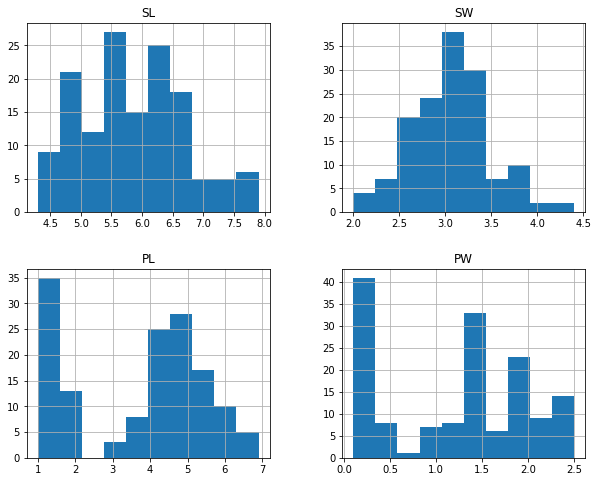

In [78]:
data.hist(figsize=(10,8))
plt.show()

In [79]:
# Filling the missing values wih median 
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [80]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

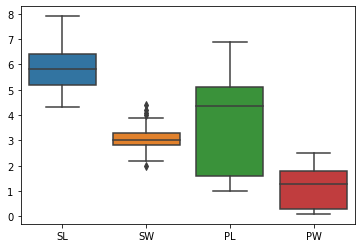

In [81]:
# Checking for outliers

sns.boxplot(data=data)

In [82]:
Q1 = np.percentile(data["SW"],25,interpolation = 'midpoint')
Q2 = np.percentile(data["SW"],50,interpolation = 'midpoint')
Q3 = np.percentile(data["SW"],75,interpolation = 'midpoint')

IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
up_limit = Q3 + (1.5*IQR)

print("IQR = ",IQR)
print("Lower limit =" ,low_limit)
print("Upper Limit =",up_limit)

IQR =  0.4500000000000002
Lower limit = 2.1249999999999996
Upper Limit = 3.9250000000000003


In [83]:
data["SW"]=np.where(data["SW"]>up_limit,up_limit,np.where(data["SW"]<low_limit,low_limit,data["SW"]))

<AxesSubplot:>

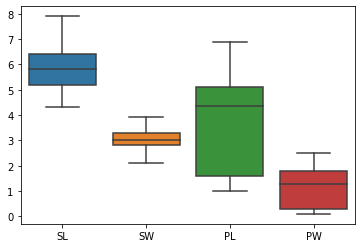

In [84]:
sns.boxplot(data=data)

In [85]:
corr=data.corr()
corr

,SL,SW,PL,PW
SL,1.000000,-0.100056,0.830554,0.800939
SW,-0.100056,1.000000,-0.402621,-0.335121
PL,0.830554,-0.402621,1.000000,0.936089
PW,0.800939,-0.335121,0.936089,1.000000


Outliers were removed.

In [86]:
data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

The data is balanced.

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm).

In [87]:
y=data['Classification']
X=data.drop(['Classification'], axis=1)

In [88]:
from sklearn import preprocessing

In [89]:
X=preprocessing.normalize(X)

In [90]:
X=pd.DataFrame(X)

In [91]:
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.751930,0.401687,0.458492,0.141178
std,0.048017,0.099588,0.158021,0.078724
min,0.631396,0.238392,0.168646,0.014956
25%,0.714322,0.326071,0.256770,0.048734
50%,0.754652,0.354679,0.535751,0.163851
75%,0.793458,0.514570,0.580025,0.197532
max,0.860939,0.607125,0.636981,0.280419


In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.2)

In [93]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

In [94]:
X_train.shape

(120, 4)

In [95]:
result = {'Classification Model':[], 'Accuracy':[], 'F1 Score':[]}

#### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

logis_model = LogisticRegression()
logis_model.fit(X_train, y_train)

y_pred = logis_model.predict(X_test)

print('Classification Model:- {}'.format(logis_model.__class__.__name__))
print('Accuracy = ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score = ',f1_score(y_test, y_pred, average='micro').round(4))
print(classification_report(y_predict,y_test))

Classification Model:- LogisticRegression
Accuracy =  0.9
F1 Score =  0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.67      1.00      0.80         6
 Iris-virginica       1.00      0.79      0.88        14

       accuracy                           0.90        30
      macro avg       0.89      0.93      0.89        30
   weighted avg       0.93      0.90      0.90        30



In [106]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model:- {}'.format(model.__class__.__name__))
print('Accuracy= ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score= ',f1_score(y_test, y_pred, average='micro').round(4))
print(classification_report(y_test, y_pred))

if model.__class__.__name__ not in result['Classification Model']:
    result['Classification Model'].append(model.__class__.__name__)
    result['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    result['F1 Score'].append(f1_score(y_test, y_pred, average='micro').round(4))


Classification Model:- LogisticRegression
Accuracy=  0.9
F1 Score=  0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30



#### KNN

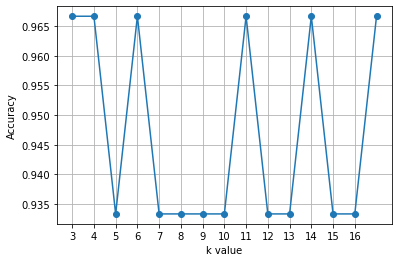

In [107]:
from sklearn.neighbors import KNeighborsClassifier

values=[]
neighbors=np.arange(3,18)
for k in neighbors:
    model=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    values.append(score)
    
plt.plot(neighbors, values, 'o-')
plt.xticks(np.arange(3.0, 17.0, 1.0))
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [108]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=7, metric='minkowski')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Classification Model:- {}'.format(model.__class__.__name__))
print('Accuracy= ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score= ',f1_score(y_test, y_pred, average='micro').round(4))
print(classification_report(y_test, y_pred))

if model.__class__.__name__ not in result['Classification Model']:
    result['Classification Model'].append(model.__class__.__name__)
    result['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    result['F1 Score'].append(f1_score(y_test, y_pred, average='micro').round(4))

Classification Model:- KNeighborsClassifier
Accuracy=  0.9333
F1 Score=  0.9333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



 #### Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model:- {}'.format(model.__class__.__name__))
print('Accuracy = ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score = ',f1_score(y_test, y_pred, average='micro').round(4))
print(classification_report(y_test, y_pred))

if model.__class__.__name__ not in result['Classification Model']:
    result['Classification Model'].append(model.__class__.__name__)
    result['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    result['F1 Score'].append(f1_score(y_test, y_pred, average='micro').round(4))

Classification Model:- DecisionTreeClassifier
Accuracy =  0.9
F1 Score =  0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30



#### SVM

In [110]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Classification Model:- {}'.format(model.__class__.__name__))
print('Accuracy = ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score = ',f1_score(y_test, y_pred, average='micro').round(4))
print(classification_report(y_test, y_pred))

if model.__class__.__name__ not in result['Classification Model']:
    result['Classification Model'].append(model.__class__.__name__)
    result['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    result['F1 Score'].append(f1_score(y_test, y_pred, average='micro').round(4))

Classification Model:- SVC
Accuracy =  0.9667
F1 Score =  0.9667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



#### Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model:- {}'.format(model.__class__.__name__))
print('Accuracy = ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score = ',f1_score(y_test, y_pred, average='micro').round(4))
print(classification_report(y_test, y_pred))

if model.__class__.__name__ not in result['Classification Model']:
    result['Classification Model'].append(model.__class__.__name__)
    result['Accuracy'].append(accuracy_score(y_test, y_pred).round(4))
    result['F1 Score'].append(f1_score(y_test, y_pred, average='micro').round(4))

Classification Model:- RandomForestClassifier
Accuracy =  0.9
F1 Score =  0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30



In [112]:
pd.DataFrame(result)

,Classification Model,Accuracy,F1 Score
0,LogisticRegression,0.9000,0.9000
1,KNeighborsClassifier,0.9333,0.9333
2,DecisionTreeClassifier,0.9000,0.9000
3,SVC,0.9667,0.9667
4,RandomForestClassifier,0.9000,0.9000


Here, all the models are showing high accuracy, so the dataset is highly balanced.
So all the models gives best results.
